# Calculating the Pumps efficency curves 

Byrjum á Vatnsenda neðra kerfi

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Pressure in mH20

In [3]:
Vatnsendi_nedri_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-ÞS213.xlsx')
Vatnsendi_nedri_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_pressure['start_time'], errors='coerce')
Vatnsendi_nedri_pressure.set_index('start_time',inplace=True)
Vatnsendi_nedri_pressure = Vatnsendi_nedri_pressure.sort_index(ascending=True)

Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure.loc['2024']
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.copy()
Vatnsendi_nedri_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Vatnsendi_nedri_pressure_2024["mH20"] = Vatnsendi_nedri_pressure_2024['mH20']* 10.197
Vatnsendi_nedri_pressure_2024.head()

# Þetta er rétt 

,mH20
start_time,
2024-01-01 01:00:00,57.10320
2024-01-01 02:00:00,57.10320
2024-01-01 03:00:00,56.89926
2024-01-01 04:00:00,56.59335
2024-01-01 05:00:00,56.38941


## Flow in lps

In [4]:
Vatnsendi_nedri_flow = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-RS213.xlsx')
Vatnsendi_nedri_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_flow['start_time'] = pd.to_datetime(Vatnsendi_nedri_flow['start_time'], errors='coerce')
Vatnsendi_nedri_flow.set_index('start_time',inplace=True)
Vatnsendi_nedri_flow = Vatnsendi_nedri_flow.sort_index(ascending=True)
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow.loc['2024']
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow_2024.copy()    
Vatnsendi_nedri_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Vatnsendi_nedri_flow_2024['Flæði [l/s]'] = Vatnsendi_nedri_flow_2024['Flæði [l/s]']
Vatnsendi_nedri_flow_2024.head()

,Flæði [l/s]
start_time,
2024-01-01 01:00:00,35.08
2024-01-01 02:00:00,34.54
2024-01-01 03:00:00,33.80
2024-01-01 04:00:00,33.28
2024-01-01 05:00:00,32.60


## Energy consumption in pump

In [5]:
df_pumps = pd.read_csv('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [6]:
Vatnsendi_nedri_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-VE-DÆ213-PS']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla.loc['2024']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla_2024.copy()
Vatnsendi_nedri_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Vatnsendi_nedri_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
Vatnsendi_nedri_dæla_2024.head()

,kW
start_time,
2024-01-01 00:00:00,0.0
2024-01-01 01:00:00,0.0
2024-01-01 02:00:00,0.0
2024-01-01 03:00:00,0.0
2024-01-01 04:00:00,0.0


## Theoretical power

In [18]:
df_calc_eff = pd.concat([Vatnsendi_nedri_pressure_2024,Vatnsendi_nedri_flow_2024,Vatnsendi_nedri_dæla_2024],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['mH20']-25)*9.81/1000
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,
2024-01-01 00:00:00,NaN,NaN,0.0,NaN
2024-01-01 01:00:00,57.10320,35.08,0.0,11.047828
2024-01-01 02:00:00,57.10320,34.54,0.0,10.877765
2024-01-01 03:00:00,56.89926,33.80,0.0,10.577093
2024-01-01 04:00:00,56.59335,33.28,0.0,10.314496


## Pump Efficiency

In [19]:
df_calc_eff['Efficiency'] = df_calc_eff['kW']/df_calc_eff['Theoretical power']
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,
2024-01-01 00:00:00,NaN,NaN,0.0,NaN,NaN
2024-01-01 01:00:00,57.10320,35.08,0.0,11.047828,0.0
2024-01-01 02:00:00,57.10320,34.54,0.0,10.877765,0.0
2024-01-01 03:00:00,56.89926,33.80,0.0,10.577093,0.0
2024-01-01 04:00:00,56.59335,33.28,0.0,10.314496,0.0


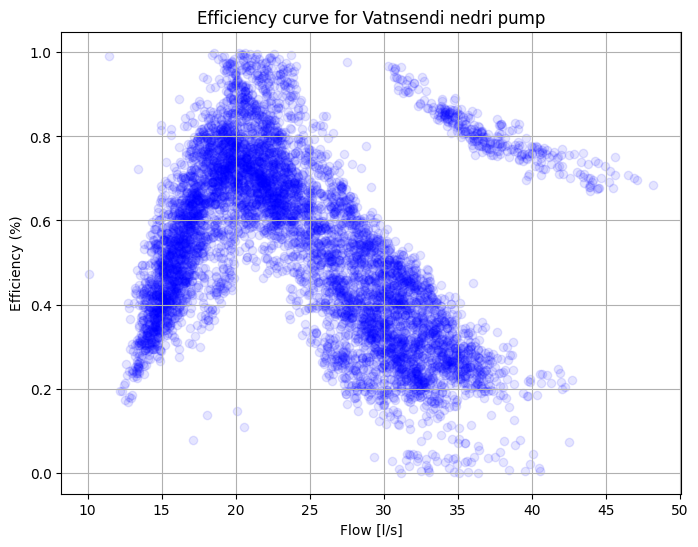

In [20]:


# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Flæði [l/s]', 'Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1]  # Remove rows where Efficiency is 0


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Flæði [l/s]'], df_clean['Efficiency'], marker='o', color='b',alpha = 0.1)

# Adding titles and labels
plt.title('Efficiency curve for Vatnsendi nedri pump')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()

In [21]:
specific_day = '2024-04-05'
filtered_data = df_calc_eff.loc[specific_day]

filtered_data

,mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,
2024-04-05 00:00:00,NaN,NaN,4.623127,NaN,NaN
2024-04-05 01:00:00,56.79729,29.34,4.842067,9.152068,0.529068
2024-04-05 02:00:00,56.79729,29.26,4.805787,9.127113,0.526540
2024-04-05 03:00:00,56.79729,29.29,4.951763,9.136471,0.541978
2024-04-05 04:00:00,56.49138,29.11,4.688665,8.992965,0.521370
2024-04-05 05:00:00,56.28744,29.79,4.575975,9.143438,0.500465
2024-04-05 06:00:00,56.89926,30.97,4.529657,9.691496,0.467385
2024-04-05 07:00:00,57.10320,33.96,3.885114,10.695104,0.363261
2024-04-05 08:00:00,57.00123,33.17,4.072340,10.413127,0.391078
